In [1]:
import os
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Detected genes of single-cell

In [2]:
info = pd.read_excel("../../1_NanoNASCseq/data/NanoNASCseq_summary_selected.xls")

runs1 = ["20220719_K562R1", "20220719_K562R2", "20220719_K562R3", "20220719_K562R4", "20220729_K562R1", "20220729_K562R2"]
runs2 = ["20220818_mESCR1", "20220818_mESCR2", "20220818_mESCR3"]

d = info[[x in runs1 for x in info["Run"]]]
d1 = d[(d["Strain"] == "K562") & (d["s4U"] == 0) & (d["Time"] == 3) & (d["ActD"].isna()) & (d["UMIs"] >= 5000)]
d2 = d[(d["Strain"] == "K562") & (d["s4U"] == 50) & (d["Time"] == 3) & (d["ActD"].isna()) & (d["UMIs"] >= 5000)]

d = info[[x in runs2 for x in info["Run"]]]
d3 = d[(d["Strain"] == "mESC") & (d["s4U"] == 0) & (d["Time"] == 3) & (d["ActD"].isna()) & (d["UMIs"] >= 5000)]
d4 = d[(d["Strain"] == "mESC") & (d["s4U"] == 400) & (d["Time"] == 3) & (d["ActD"].isna()) & (d["UMIs"] >= 5000)]
print(len(d1), len(d2), len(d3), len(d4), sep="\t")

97	161	22	40


3913.0
2790.0
3331.5
2932.0


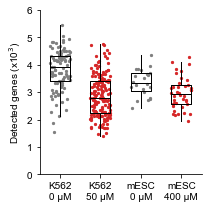

In [3]:
np.random.seed(0)

ys_list = [d1["Genes"], d2["Genes"], d3["Genes"], d4["Genes"]]
colors = ["C7", "C3", "C7", "C3"]

for ys in ys_list:
    print(np.median(ys))

plt.figure(figsize=(3, 3))
for i, ys in enumerate(ys_list):
    ys = np.array(ys) / 1e3
    w = 0.5
    xs = np.random.random(len(ys)) * w - w/2 + i
    plt.boxplot(ys, positions=[i], widths=w, 
                showfliers=False, showcaps=False, medianprops={"color": "black"})
    plt.scatter(xs, ys, s=20, marker=".", color=colors[i])
plt.xticks(np.arange(4), ["K562\n0 μM", "K562\n50 μM", "mESC\n0 μM", "mESC\n400 μM"])
plt.ylabel("Detected genes (x10$^3$)")
plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)
plt.ylim(0, 6)
plt.tight_layout()
plt.savefig("figures/detected_genes.pdf", dpi=300)

# Reads and detected genes

Cells	272	64


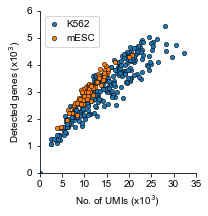

In [2]:
info = pd.read_excel("../../1_NanoNASCseq/data/NanoNASCseq_summary_selected.xls")

runs1 = ["20220719_K562R1", "20220719_K562R2", "20220719_K562R3", "20220719_K562R4", "20220729_K562R1", "20220729_K562R2"]
runs2 = ["20220818_mESCR1", "20220818_mESCR2", "20220818_mESCR3"]

d = info[[x in runs1 for x in info["Run"]]]
d1 = d[(d["Strain"] == "K562") & ((d["s4U"] == 0) | (d["s4U"] == 50)) & (d["Time"] == 3) & (d["ActD"].isna())]

d = info[[x in runs2 for x in info["Run"]]]
d2 = d[(d["Strain"] == "mESC") & ((d["s4U"] == 0) | (d["s4U"] == 400)) & (d["Time"] == 3) & (d["ActD"].isna())]

print("Cells", len(d1), len(d2), sep="\t")

plt.figure(figsize=(3, 3.1))
for strain in ["K562", "mESC"]:
    if strain == "K562":
        tmp = d1
    else:
        tmp = d2
    xs = tmp["UMIs"] / 1e3
    ys = tmp["Genes"] / 1e3
    plt.scatter(xs, ys, lw=0.5, s=20, edgecolor="black", label=strain, alpha=1)
plt.xlabel("No. of UMIs (x10$^3$)")
plt.ylabel("Detected genes (x10$^3$)")
plt.xlim(0, 35)
plt.ylim(0, 6)
plt.xticks([0, 5, 10, 15, 20, 25, 30, 35])
plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)
plt.legend(frameon=True, handlelength=1)
plt.tight_layout()
plt.savefig("figures/umis_and_genes.pdf", dpi=300)

# Detected genes of randomly select cell

In [18]:
def merge(array):
    genes = array[0]
    for i in range(1, len(array)):
        genes = genes | array[i]
    return genes

n_cells = [1] + list(np.arange(5, 96, 5))
repeat = 10
m = np.zeros((repeat, len(n_cells)))

random.seed(0)
for i in range(repeat):
    for j in range(len(n_cells)):
        n = n_cells[j]
        tmp = random.sample(array1, n)
        genes = merge(tmp)
        m[i][j] = len(genes)

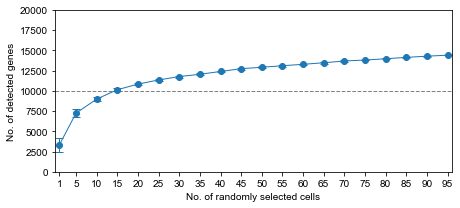

In [21]:
d = pd.DataFrame(m, columns=n_cells)
ys = d.mean(axis=0)
yerr = d.std(axis=0)
xs = np.arange(len(ys))
xs = n_cells

plt.figure(figsize=(6.5, 3))
# plt.boxplot(d, positions=xs, widths=0.8, showcaps=False, showfliers=False)
plt.errorbar(xs, ys, yerr=yerr, capsize=4, lw=1, marker="o")
plt.axhline(10000, lw=1, ls="--", color="grey")
plt.xticks(xs, d.columns)
# plt.xlim(min(xs) - 0.5, max(xs) + 0.5)
plt.xlim(0, 96)
plt.ylim(0, 20000)
plt.xlabel("No. of randomly selected cells")
plt.ylabel("No. of detected genes")
plt.tight_layout()
plt.savefig("figures/detected_genes.randomly_cells.pdf", dpi=300)